# Nervous system widespread analysis of Glra3 expression in Zeisel et al dataset

The following analysis was performed for our article; , where we wanted to investigate the expression of Glra3 in distinct areas of the central nervous system as well as bodily organs in both female and male mice to investigate if there are any expressional differences between the sexes. Using qPCR, we found that () 

For the following analysis, we wanted to validate the expressional findings from the qPCR with analysis of pre-existing single-cell mRNA sequencing data. Here, we are invesigating the Glra3 expression in the different areas of the nervous system, including the peripheral nervous system, spinal cord and brain. The analysis was conducted on the Zeisel et al (2018) dataset [1]. The dataset 'l5_all.loom' was aquired from (http://mousebrain.org/) and contains expressional data from 27,998 genes in 160,796 cells. The dataset was analysed using SCANPY [2].

The major findings of this sequencing analysis is that Glra3 is lowly expressed in a number of different areas brain areas and spinal cord- both excitatory and inhibitory neurons, as well as in hindbrain and enteric neurons. Expression was however not found in peripheral neurons nor the cerebellum. 



References;


[1] Zeisel, A., Hochgerner, H., Lönnerberg, P. et al. (2018). Molecular Architecture of the Mouse Nervous System. Cell, doi: 10.1016/j.cell.2018.06.021

[2] Wolf, F.A.,Angerer, P., Theis, F.J. 2018. SCANPY: large-scale single-cell gene expression data analysis. 

In [1]:
# import necessary modules 
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import loompy

# make the text in figures editable in Illustrator
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

The following functions were used for analysis of the Zeisel et al dataset

In [2]:
"""function for calculating the percentage of cells expressing gene of interest"""
def percentage_exp(adata, genes):
    per_list = []
    for gene in genes:
        percentage = len(adata[adata[:, gene].X > 0.1])/len(adata.X) # calculate the percentage of cells expressing gene(s) of interest
        per_list.append((gene, percentage*100)) # add the name of gene and the percentage to list
    return sorted(per_list, key=lambda tup: tup[1], reverse = True) #rank the level of prevalence in list

"""function for calculating the number of cells expressing gene of interest"""
def number_exp(adata, genes):
    num_list = []
    for gene in genes:
        percentage = len(adata[adata[:, gene].X > 0.1])/len(adata.X)# calculate the percentage of cells expressing gene(s) of interest
        num_list.append((gene, percentage*len(adata.X))) # add the name of gene and the number of cells expressing gene of intererest
    return sorted(num_list, key=lambda tup: tup[1], reverse = True) #rank the level of prevalence in list
                                                           
    

"""function for calculating the number of cells belonging to specific categorical observation"""
def calc_celltype_observation(adata, observation):
    pd_adata = pd.DataFrame(index = adata.obs_names, columns = adata.var_names, data = adata.X) #convert AnnData object to a dataframe. 
    # does not work to make calculations directly onthe AnnData object
    pd_adata['obs_name'] = adata.obs[observation] #create new column in dataframe depending on the target observation in the AnnData object
    pd_celltype = pd.DataFrame(pd_adata.loc[pd_adata.index, 'obs_name']) # extract the index and the target observation
    pd_celltype = pd.DataFrame(pd_adata.groupby('obs_name').size(), columns = ['number_cells']) #calculate the number of cells belonging to each 
    return(pd_celltype)  

In [4]:
# read the Zeisel et al dataset
adata = sc.read_loom('l5_all.loom', sparse = False)
adata

C:\Users\hanwe868\Miniconda3\envs\sc\lib\site-packages\anndata\_io\read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  axis_df[k] = v
C:\Users\hanwe868\Miniconda3\envs\sc\lib\site-packages\anndata\_io\read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  axis_df[k] = v
C:\Users\hanwe868\Miniconda3\envs\sc\lib\site-packages\anndata\_io\read.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all colu

AnnData object with n_obs × n_vars = 160796 × 27998
    obs: 'Age', 'AnalysisPool', 'AnalysisProject', 'Bucket', 'CellConc', 'Cell_Conc', 'ChipID', 'Class', 'ClassProbability_Astrocyte', 'ClassProbability_Astrocyte,Immune', 'ClassProbability_Astrocyte,Neurons', 'ClassProbability_Astrocyte,Oligos', 'ClassProbability_Astrocyte,Vascular', 'ClassProbability_Bergmann-glia', 'ClassProbability_Blood', 'ClassProbability_Blood,Vascular', 'ClassProbability_Enteric-glia', 'ClassProbability_Enteric-glia,Cycling', 'ClassProbability_Ependymal', 'ClassProbability_Ex-Neurons', 'ClassProbability_Ex-Vascular', 'ClassProbability_Immune', 'ClassProbability_Immune,Neurons', 'ClassProbability_Immune,Oligos', 'ClassProbability_Neurons', 'ClassProbability_Neurons,Cycling', 'ClassProbability_Neurons,Oligos', 'ClassProbability_Neurons,Satellite-glia', 'ClassProbability_Neurons,Vascular', 'ClassProbability_OEC', 'ClassProbability_Oligos', 'ClassProbability_Oligos,Cycling', 'ClassProbability_Oligos,Vascular', 'Cl

In [4]:
# isolate all true neurons in the dataset
adata = adata[adata.obs['Class'] == 'Neurons']
adata

View of AnnData object with n_obs × n_vars = 74539 × 27998
    obs: 'Age', 'AnalysisPool', 'AnalysisProject', 'Bucket', 'CellConc', 'Cell_Conc', 'ChipID', 'Class', 'ClassProbability_Astrocyte', 'ClassProbability_Astrocyte,Immune', 'ClassProbability_Astrocyte,Neurons', 'ClassProbability_Astrocyte,Oligos', 'ClassProbability_Astrocyte,Vascular', 'ClassProbability_Bergmann-glia', 'ClassProbability_Blood', 'ClassProbability_Blood,Vascular', 'ClassProbability_Enteric-glia', 'ClassProbability_Enteric-glia,Cycling', 'ClassProbability_Ependymal', 'ClassProbability_Ex-Neurons', 'ClassProbability_Ex-Vascular', 'ClassProbability_Immune', 'ClassProbability_Immune,Neurons', 'ClassProbability_Immune,Oligos', 'ClassProbability_Neurons', 'ClassProbability_Neurons,Cycling', 'ClassProbability_Neurons,Oligos', 'ClassProbability_Neurons,Satellite-glia', 'ClassProbability_Neurons,Vascular', 'ClassProbability_OEC', 'ClassProbability_Oligos', 'ClassProbability_Oligos,Cycling', 'ClassProbability_Oligos,Vascula

In [5]:
calc_celltype_observation(adata, 'TaxonomyRank3')

,number_cells
obs_name,
Cerebellum neurons,5292
"Cholinergic, monoaminergic and peptidergic neurons",3977
Di- and mesencephalon neurons,10481
Enteric neurons,1105
Hindbrain neurons,1144
Immature neural,5466
Peripheral sensory neurons,1580
Spinal cord neurons,1922
Sympathetic neurons,886


In [7]:
calc_celltype_observation(adata, 'TaxonomyRank4')

,number_cells
obs_name,
Cerebellum neurons,5292
Cholinergic and monoaminergic neurons,1071
Dentate gyrus granule neurons,4368
Di- and mesencephalon excitatory neurons,6455
Di- and mesencephalon inhibitory neurons,4026
Enteric neurons,1105
Glutamatergic neuroblasts,644
Hindbrain neurons,1144
Non-glutamatergic neuroblasts,4822


In [ ]:
calc_celltype_observation(adata, 'Description')

In [ ]:
calc_celltype_observation(adata, 'Region')

In [5]:
# filter out cells expressing less than 200 different genes and genes found in less than 3 cells
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
adata

# make variables and observations unique
adata.var_names_make_unique()
adata.obs_names_make_unique()
adata

Trying to set attribute `.obs` of view, copying.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are n

AnnData object with n_obs × n_vars = 74529 × 21194
    obs: 'Age', 'AnalysisPool', 'AnalysisProject', 'Bucket', 'CellConc', 'Cell_Conc', 'ChipID', 'Class', 'ClassProbability_Astrocyte', 'ClassProbability_Astrocyte,Immune', 'ClassProbability_Astrocyte,Neurons', 'ClassProbability_Astrocyte,Oligos', 'ClassProbability_Astrocyte,Vascular', 'ClassProbability_Bergmann-glia', 'ClassProbability_Blood', 'ClassProbability_Blood,Vascular', 'ClassProbability_Enteric-glia', 'ClassProbability_Enteric-glia,Cycling', 'ClassProbability_Ependymal', 'ClassProbability_Ex-Neurons', 'ClassProbability_Ex-Vascular', 'ClassProbability_Immune', 'ClassProbability_Immune,Neurons', 'ClassProbability_Immune,Oligos', 'ClassProbability_Neurons', 'ClassProbability_Neurons,Cycling', 'ClassProbability_Neurons,Oligos', 'ClassProbability_Neurons,Satellite-glia', 'ClassProbability_Neurons,Vascular', 'ClassProbability_OEC', 'ClassProbability_Oligos', 'ClassProbability_Oligos,Cycling', 'ClassProbability_Oligos,Vascular', 'Cla

In [6]:
# no ERCC genes identified, do not use to calulate metrics
print([name for name in adata.var_names if name.startswith('ERCC')])
print([name for name in adata.var_names if name.startswith('ercc')])

[]
[]


In [7]:
# add the total counts per cell as observation
adata.obs['n_counts'] = np.sum(adata.X, axis=1)

# annotate the group of mitochondrial genes as 'mt'
adata.var['mt'] = adata.var_names.str.startswith('mt-')  
# calulate the general metrics and metrics based on mitochondrial genes
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], inplace=True)

# make variables and observations unique
adata.var_names_make_unique()
adata.obs_names_make_unique()
adata

AnnData object with n_obs × n_vars = 74529 × 21194
    obs: 'Age', 'AnalysisPool', 'AnalysisProject', 'Bucket', 'CellConc', 'Cell_Conc', 'ChipID', 'Class', 'ClassProbability_Astrocyte', 'ClassProbability_Astrocyte,Immune', 'ClassProbability_Astrocyte,Neurons', 'ClassProbability_Astrocyte,Oligos', 'ClassProbability_Astrocyte,Vascular', 'ClassProbability_Bergmann-glia', 'ClassProbability_Blood', 'ClassProbability_Blood,Vascular', 'ClassProbability_Enteric-glia', 'ClassProbability_Enteric-glia,Cycling', 'ClassProbability_Ependymal', 'ClassProbability_Ex-Neurons', 'ClassProbability_Ex-Vascular', 'ClassProbability_Immune', 'ClassProbability_Immune,Neurons', 'ClassProbability_Immune,Oligos', 'ClassProbability_Neurons', 'ClassProbability_Neurons,Cycling', 'ClassProbability_Neurons,Oligos', 'ClassProbability_Neurons,Satellite-glia', 'ClassProbability_Neurons,Vascular', 'ClassProbability_OEC', 'ClassProbability_Oligos', 'ClassProbability_Oligos,Cycling', 'ClassProbability_Oligos,Vascular', 'Cla

... storing 'Age' as categorical
... storing 'AnalysisPool' as categorical
... storing 'AnalysisProject' as categorical
... storing 'Bucket' as categorical
... storing 'CellConc' as categorical
... storing 'Cell_Conc' as categorical
... storing 'ChipID' as categorical
... storing 'Class' as categorical
... storing 'ClusterName' as categorical
... storing 'Comment' as categorical
... storing 'Comments' as categorical
... storing 'DateCaptured' as categorical
... storing 'Date_Captured' as categorical
... storing 'Description' as categorical
... storing 'Developmental_compartment' as categorical
... storing 'DonorID' as categorical
... storing 'Estimated Number of Cells' as categorical
... storing 'Flowcell' as categorical
... storing 'Fraction Reads in Cells' as categorical
... storing 'Label' as categorical
... storing 'Location_based_on' as categorical
... storing 'Mean Reads per Cell' as categorical
... storing 'Median Genes per Cell' as categorical
... storing 'Median UMI Counts per

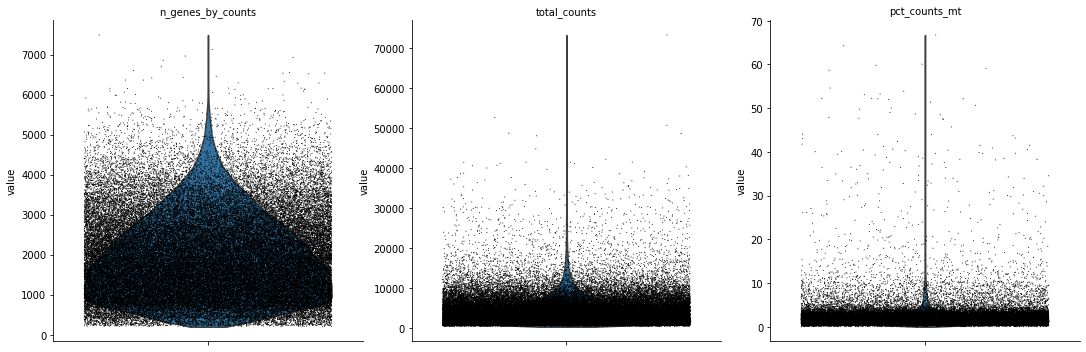

AnnData object with n_obs × n_vars = 74529 × 21194
    obs: 'Age', 'AnalysisPool', 'AnalysisProject', 'Bucket', 'CellConc', 'Cell_Conc', 'ChipID', 'Class', 'ClassProbability_Astrocyte', 'ClassProbability_Astrocyte,Immune', 'ClassProbability_Astrocyte,Neurons', 'ClassProbability_Astrocyte,Oligos', 'ClassProbability_Astrocyte,Vascular', 'ClassProbability_Bergmann-glia', 'ClassProbability_Blood', 'ClassProbability_Blood,Vascular', 'ClassProbability_Enteric-glia', 'ClassProbability_Enteric-glia,Cycling', 'ClassProbability_Ependymal', 'ClassProbability_Ex-Neurons', 'ClassProbability_Ex-Vascular', 'ClassProbability_Immune', 'ClassProbability_Immune,Neurons', 'ClassProbability_Immune,Oligos', 'ClassProbability_Neurons', 'ClassProbability_Neurons,Cycling', 'ClassProbability_Neurons,Oligos', 'ClassProbability_Neurons,Satellite-glia', 'ClassProbability_Neurons,Vascular', 'ClassProbability_OEC', 'ClassProbability_Oligos', 'ClassProbability_Oligos,Cycling', 'ClassProbability_Oligos,Vascular', 'Cla

In [8]:
#plot some general information and the mitochondrial data
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

# make variables and observations unique
adata.var_names_make_unique()
adata.obs_names_make_unique()
adata

In [9]:
# make variables and observations unique
adata.var_names_make_unique()
adata.obs_names_make_unique()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log1p_total_counts', ylabel='Density'>

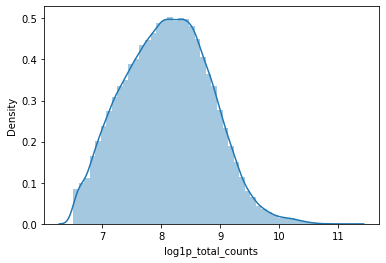

In [31]:
# plot the distribution of logaritmized total counts. Want to include cells with higher counts
# to avoid smaller cells such as glial cells
sns.distplot(adata.obs['log1p_total_counts'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


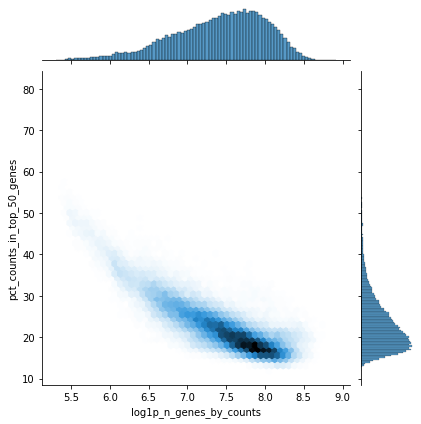

In [11]:
# plot the logaritmized number of genes by counts and the percentage of counts that express the top 50 most expressed genes
sns.jointplot('log1p_n_genes_by_counts', 'pct_counts_in_top_50_genes', data=adata.obs, kind="hex")

In [12]:
# do the actual filtering to exclude cells 
adata = adata[adata.obs.pct_counts_mt < 20, :] # include cells with low mithochondrial expression
adata = adata[adata.obs.log1p_total_counts > 6.5, :]
adata = adata[adata.obs.pct_counts_in_top_50_genes < 50, :] # filter cells with distributed gene counts
adata = adata[adata.obs.log1p_n_genes_by_counts > 6.0, :] # filter cells with broad gene capture

In [13]:
# normalize the number of reads per cell to the median number of reads
sc.pp.normalize_per_cell(adata, counts_per_cell_after= adata.obs['n_counts'].median())

Trying to set attribute `.obs` of view, copying.


In [14]:
# logaritmize data
sc.pp.log1p(adata)

adata

AnnData object with n_obs × n_vars = 72020 × 21194
    obs: 'Age', 'AnalysisPool', 'AnalysisProject', 'Bucket', 'CellConc', 'Cell_Conc', 'ChipID', 'Class', 'ClassProbability_Astrocyte', 'ClassProbability_Astrocyte,Immune', 'ClassProbability_Astrocyte,Neurons', 'ClassProbability_Astrocyte,Oligos', 'ClassProbability_Astrocyte,Vascular', 'ClassProbability_Bergmann-glia', 'ClassProbability_Blood', 'ClassProbability_Blood,Vascular', 'ClassProbability_Enteric-glia', 'ClassProbability_Enteric-glia,Cycling', 'ClassProbability_Ependymal', 'ClassProbability_Ex-Neurons', 'ClassProbability_Ex-Vascular', 'ClassProbability_Immune', 'ClassProbability_Immune,Neurons', 'ClassProbability_Immune,Oligos', 'ClassProbability_Neurons', 'ClassProbability_Neurons,Cycling', 'ClassProbability_Neurons,Oligos', 'ClassProbability_Neurons,Satellite-glia', 'ClassProbability_Neurons,Vascular', 'ClassProbability_OEC', 'ClassProbability_Oligos', 'ClassProbability_Oligos,Cycling', 'ClassProbability_Oligos,Vascular', 'Cla

In [15]:
calc_celltype_observation(adata, 'TaxonomyRank4')

,number_cells
obs_name,
Cerebellum neurons,3283
Cholinergic and monoaminergic neurons,1064
Dentate gyrus granule neurons,4357
Di- and mesencephalon excitatory neurons,6422
Di- and mesencephalon inhibitory neurons,4015
Enteric neurons,943
Glutamatergic neuroblasts,635
Hindbrain neurons,1132
Non-glutamatergic neuroblasts,4773


## Analysis of Glra3 expression in all neurons based on nervous system area

From violin plot, can see that Glra3 is expressed lowly, but widespreadly expressed in the nervous system

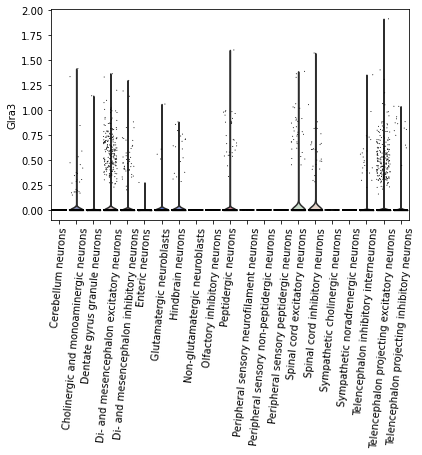

In [16]:
sc.pl.violin(adata, 'Glra3', use_raw = False, stripplot= True, jitter = 0.4, groupby = 'TaxonomyRank4', 
             rotation =85, save= 'violin_glra3_expression.pdf')

Here, the expression of Glra3, as well as Slc17a6 (Vglut2, excitatory marker) and Slc32a1 (Viaat, inhibitory marker) was investigated in all neurons of the respective nervous system areas using a dotplot. Even more here, we can see that Glra3 is lowly expressed in a small portion of the respective Glra3 expressing area

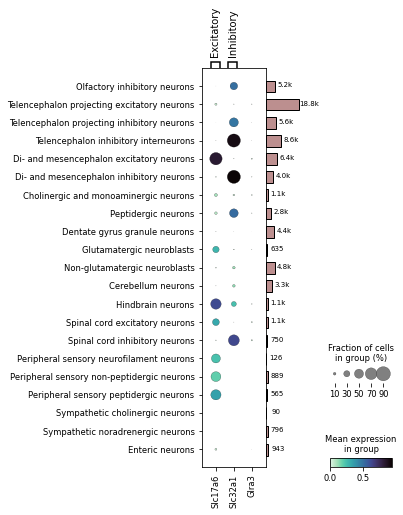

In [20]:
marker_genes = ['Slc17a6','Slc32a1','Glra3']
labels = ['Excitatory', 'Inhibitory']
label_pos = [(0,0), (1,1)]
order_cat = ['Olfactory inhibitory neurons', 'Telencephalon projecting excitatory neurons', 'Telencephalon projecting inhibitory neurons',
             'Telencephalon inhibitory interneurons', 'Di- and mesencephalon excitatory neurons', 
             'Di- and mesencephalon inhibitory neurons', 'Cholinergic and monoaminergic neurons', 
             'Peptidergic neurons', 'Dentate gyrus granule neurons', 'Glutamatergic neuroblasts', 'Non-glutamatergic neuroblasts', 
             'Cerebellum neurons', 'Hindbrain neurons', 'Spinal cord excitatory neurons', 
             'Spinal cord inhibitory neurons', 'Peripheral sensory neurofilament neurons', 
             'Peripheral sensory non-peptidergic neurons', 'Peripheral sensory peptidergic neurons', 
             'Sympathetic cholinergic neurons', 'Sympathetic noradrenergic neurons', 'Enteric neurons']

sc.pl.DotPlot(adata, marker_genes, var_group_labels =labels, var_group_positions= label_pos, 
                          use_raw = False, groupby = 'TaxonomyRank4', categories_order= order_cat, cmap ='mako_r').add_totals(color = 'rosybrown').savefig('marker_expression_all.pdf')

To further investigate the Glra3 expressing neurons, the expression of Glra3 is plotted as a scatter plot in order to set a expression level threshold (where cells are considered to express Glra3). Based on this plot, the threshold is set to 0.1 (log1p value)

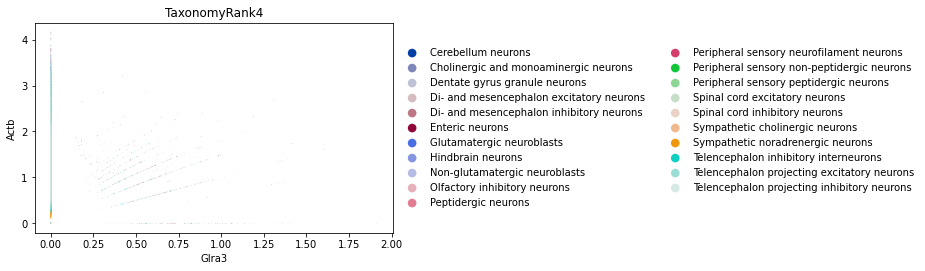

In [21]:
sc.pl.scatter(adata, x = 'Glra3', y = 'Actb', color = 'TaxonomyRank4')

In [22]:
adata.obs['glra3_cell'] = (adata[:, 'Glra3'].X > 0.1).astype(str)

The prevalence of expression of targeted Glr genes is investigated in all neurons in the dataset

In [24]:
glyr_genes = [gene for gene in adata.var_names if gene.startswith('Glr')]

percentage_exp(adata, glyr_genes)

[('Glrx5', 60.96639822271591),
 ('Glrx2', 43.49486253818384),
 ('Glrx3', 43.151902249375176),
 ('Glrb', 32.53957234101638),
 ('Glrx', 21.178839211330185),
 ('Glra2', 6.303804498750347),
 ('Glra1', 3.9975006942515967),
 ('Glra3', 0.8719800055540128),
 ('Glrp1', 0.037489586226048324),
 ('Glra4', 0.020827547903360177)]

In [25]:
# isolate the Glra3 expressing cells
adata_glra3 = adata[adata.obs['glra3_cell'] == 'True']
adata_glra3

View of AnnData object with n_obs × n_vars = 628 × 21194
    obs: 'Age', 'AnalysisPool', 'AnalysisProject', 'Bucket', 'CellConc', 'Cell_Conc', 'ChipID', 'Class', 'ClassProbability_Astrocyte', 'ClassProbability_Astrocyte,Immune', 'ClassProbability_Astrocyte,Neurons', 'ClassProbability_Astrocyte,Oligos', 'ClassProbability_Astrocyte,Vascular', 'ClassProbability_Bergmann-glia', 'ClassProbability_Blood', 'ClassProbability_Blood,Vascular', 'ClassProbability_Enteric-glia', 'ClassProbability_Enteric-glia,Cycling', 'ClassProbability_Ependymal', 'ClassProbability_Ex-Neurons', 'ClassProbability_Ex-Vascular', 'ClassProbability_Immune', 'ClassProbability_Immune,Neurons', 'ClassProbability_Immune,Oligos', 'ClassProbability_Neurons', 'ClassProbability_Neurons,Cycling', 'ClassProbability_Neurons,Oligos', 'ClassProbability_Neurons,Satellite-glia', 'ClassProbability_Neurons,Vascular', 'ClassProbability_OEC', 'ClassProbability_Oligos', 'ClassProbability_Oligos,Cycling', 'ClassProbability_Oligos,Vascular'

Calculate the percentage of cells in each nervous system area that expressed Glra3

In [26]:
df_glra3 = calc_celltype_observation(adata_glra3, 'TaxonomyRank4')
df_all = calc_celltype_observation(adata, 'TaxonomyRank4')

print(df_glra3)
print(df_all)

# print the percentage of neurons from each cluster expressing Glra3
print(df_glra3.div(df_all)*100)

                                             number_cells
obs_name                                                 
Cholinergic and monoaminergic neurons                  25
Dentate gyrus granule neurons                           1
Di- and mesencephalon excitatory neurons              197
Di- and mesencephalon inhibitory neurons               43
Enteric neurons                                         1
Glutamatergic neuroblasts                               4
Hindbrain neurons                                      18
Peptidergic neurons                                    29
Spinal cord excitatory neurons                         35
Spinal cord inhibitory neurons                         28
Telencephalon inhibitory interneurons                  21
Telencephalon projecting excitatory neurons           212
Telencephalon projecting inhibitory neurons            14
                                             number_cells
obs_name                                                 
Cerebellum neu

### Analysis of Glra3 expression overlap with Vglut2 and Viaat in the respective nervous system areas

Here we are investigating the expression of Vglut2 and Viaat in the Glra3 neurons of each of the areas. Again the expression of the targeted genes are investigated using a dotplot. 

There is an expected overlap with the respective excitatory or inhibitory marker depending on the area. 

/opt/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.obs` of view, copying.
... storing 'glra3_cell' as categorical


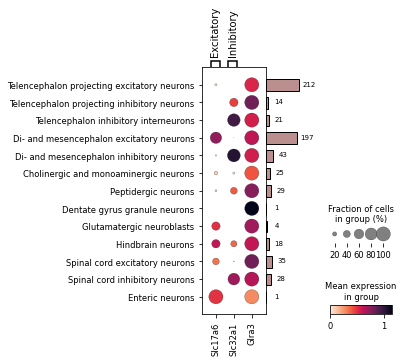

In [27]:
order_cat_glra3 = ['Telencephalon projecting excitatory neurons', 'Telencephalon projecting inhibitory neurons',
             'Telencephalon inhibitory interneurons', 'Di- and mesencephalon excitatory neurons', 
             'Di- and mesencephalon inhibitory neurons', 'Cholinergic and monoaminergic neurons', 
             'Peptidergic neurons', 'Dentate gyrus granule neurons', 'Glutamatergic neuroblasts', 
             'Hindbrain neurons', 'Spinal cord excitatory neurons', 
             'Spinal cord inhibitory neurons', 'Enteric neurons']
labels = ['Excitatory', 'Inhibitory']
label_pos = [(0,0), (1,1)]

sc.pl.DotPlot(adata_glra3, marker_genes, var_group_labels =labels, var_group_positions= label_pos, 
                          use_raw = False, groupby = 'TaxonomyRank4', categories_order= order_cat_glra3, cmap = 'rocket_r').add_totals(color = 'rosybrown').savefig('marker_expression_glra3_cells.pdf')

The expression prevalence of the marker genes are calculated for the Glra3 expressing neurons

In [28]:
percentage_exp(adata_glra3, marker_genes)

[('Glra3', 100.0),
 ('Slc17a6', 31.687898089171973),
 ('Slc32a1', 16.878980891719745)]

From the start, we were hoping to analyse the dataset by also taking sex into consideration. Unfortunatly for this case, the sequencing was conducted on pooled animals from both sexes and thus, we can not do this comparison. 

In [29]:
calc_celltype_observation(adata, 'Sex')

,number_cells
obs_name,
1F,13506
1M,4160
1M 1F,10421
1M 2F,839
2M,6
2M 1F,4698
2M 2F,1309
?,1088
F,15931


In [30]:
calc_celltype_observation(adata_glra3, 'Sex')

,number_cells
obs_name,
1F,65
1M,119
1M 1F,156
1M 2F,3
2M 1F,15
2M 2F,1
?,14
F,111
M,143
